In [54]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import re



with open("equation.txt") as f:
    for line in f:
        e = line #e is the equation

#pe is the proper equation format
pe = e

functions = ['sin', 'cos', 'tan', 'exp', 'log', 'sqrt']

for f in functions:
    pe = re.sub(rf'\b{f}\b', f'np.{f}', pe)

pe = pe.replace('^', '**')

print(pe)

def make_function(expr_str):
    allowed_names = {
        'np': np,
        'x': None  # placeholder, replaced at call time
    }

    def f(x):
        local_dict = allowed_names.copy()
        local_dict['x'] = x
        return eval(expr_str, {"__builtins__": {}}, local_dict)

    return f


np.sin(x)+np.tan(x**2)


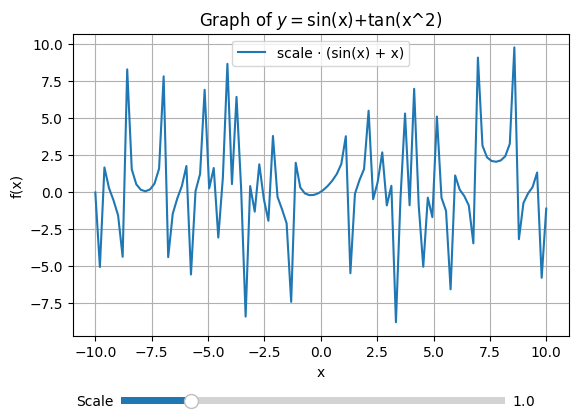

In [55]:
f = make_function(pe)

x = np.linspace(-10, 10, 100)
y = f(x)

fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.25)

scale0 = 1.0
[line] = ax.plot(x, scale0 * y, label='scale · (sin(x) + x)')
ax.set_title(r"Graph of $y =$"+e)
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.grid(True)
ax.legend()

ax_slider = plt.axes([0.2, 0.1, 0.6, 0.03])
scale_slider = Slider(
    ax=ax_slider,
    label='Scale',
    valmin=0.1,
    valmax=5.0,
    valinit=scale0
)

def update(val):
    scale = scale_slider.val
    line.set_ydata(scale * y)
    fig.canvas.draw_idle()

scale_slider.on_changed(update)

plt.show()
